In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

True Positive : 10000
False Positive : 100
True Negative : 0
Flase Negative : 0
Accuracy : 0.9900990099009901
Precision : 0.9900990099009901
Recall : 1.0
F1 score : 0.9950248756218906
TPR : 1.0
FPR : 1.0
--------------------
AUC score : 0.48829900000000004


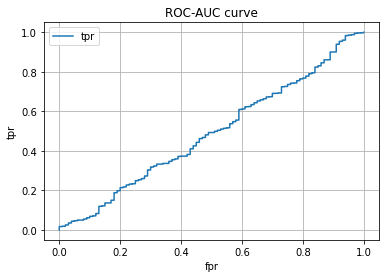

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Datasets/5_a.csv')

df.head()


# print(df['y_pred'].value_counts())

def matrix(df):
    
    df['y_pred'] = df['proba'].apply(lambda x : 0 if x < 0.5 else 1)
    
    #calculating tp,tn,fp,fn

    tp = df.loc[(df['y'] == 1) & (df['y_pred'] == 1)]['y'].count()
    tn = df.loc[(df['y'] == 0) & (df['y_pred'] == 0)]['y'].count()
    fp = df.loc[(df['y'] == 0) & (df['y_pred'] == 1)]['y'].count()
    fn = df.loc[(df['y'] == 1) & (df['y_pred'] == 0)]['y'].count()
    
    #calculating precision,recall,f1 score
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn)/(tp + fp + fn + tn)
    f1 = 2 * ((precision*recall)/(precision + recall))
    
    #calculating tpr, fpr 
    tpr = tp / (tp + fn)
    
    fpr = fp / (fp + tn)
    
    print(f'True Positive : {tp}')
    print(f'False Positive : {fp}')
    print(f'True Negative : {tn}')
    
    print(f'Flase Negative : {fn}')
    
    print(f'Accuracy : {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1 score : {f1}')
    
    print(f'TPR : {tpr}')
    print(f'FPR : {fpr}')
    
    print('-'*20)
    
    # return 1
    
def auc(df):
    tpr_array = []
    fpr_array = []
    best_a = []
    for i in np.sort(df['proba'].unique()):
        df['y_pred_auc'] = df['proba'].apply(lambda x : 0 if x < i else 1)    #calculating the pred value for each threshold of probability score
      
      #calculating tp,tn,fp,fn for each of the threshold values
        tp = df.loc[(df['y'] == 1) & (df['y_pred_auc'] == 1)]['y'].count()
        tn = df.loc[(df['y'] == 0) & (df['y_pred_auc'] == 0)]['y'].count()
        fp = df.loc[(df['y'] == 0) & (df['y_pred_auc'] == 1)]['y'].count()
        fn = df.loc[(df['y'] == 1) & (df['y_pred_auc'] == 0)]['y'].count()
        
        #calculating tpr and fpr for each threshold value
        tpr = tp / (tp + fn)        
        fpr = fp / (fp + tn)
        tpr_array.append(tpr)
        fpr_array.append(fpr)



    tpr1 = np.array(tpr_array)
    fpr1 = np.array(fpr_array)
    auc_score = np.trapz(sorted(tpr_array),sorted(fpr_array))      #calculating the auc score from tpr and fpr arrays
    print(f'AUC score : {auc_score}')
    df_tpr_fpr = pd.DataFrame({'tpr':tpr_array,'fpr':fpr_array})
    df_tpr_fpr.plot('fpr','tpr',title='ROC-AUC curve',ylabel = 'tpr',grid = True)    #plotting the tpr-fpr curve

matrix(df)
# matrix(df1)
auc(df)

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

True Positive : 55
False Positive : 239
True Negative : 9761
Flase Negative : 45
Accuracy : 0.9718811881188119
Precision : 0.1870748299319728
Recall : 0.55
F1 score : 0.2791878172588833
TPR : 0.55
FPR : 0.0239
--------------------
AUC score : 0.9377570000000001


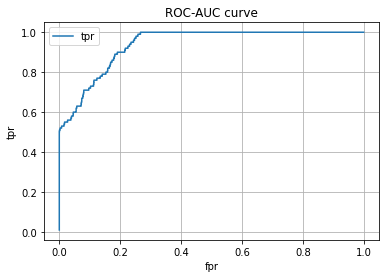

In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/Datasets/5_b.csv')


#above 2 functions are called for the second dataset
matrix(df1)        
auc(df1)

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

True Positive : 585
False Positive : 168
True Negative : 1637
Flase Negative : 462
Accuracy : 0.7791023842917251
Precision : 0.7768924302788844
Recall : 0.5587392550143266
F1 score : 0.65
TPR : 0.5587392550143266
FPR : 0.09307479224376732
--------------------
0.8288141557331724
Best proba 854    0.230039
Name: prob, dtype: float64


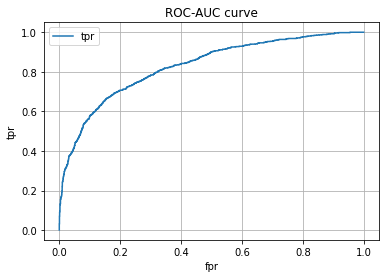

In [ ]:
df3 = pd.read_csv('/content/gdrive/My Drive/Datasets/5_c.csv')


def matrix_auc(df):
    
    df['y_pred'] = df['prob'].apply(lambda x : 0 if x < 0.5 else 1)
    
    tp = df.loc[(df['y'] == 1) & (df['y_pred'] == 1)]['y'].count()
    tn = df.loc[(df['y'] == 0) & (df['y_pred'] == 0)]['y'].count()
    fp = df.loc[(df['y'] == 0) & (df['y_pred'] == 1)]['y'].count()
    fn = df.loc[(df['y'] == 1) & (df['y_pred'] == 0)]['y'].count()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn)/(tp + fp + fn + tn)
    f1 = 2 * ((precision*recall)/(precision + recall))
    
    tpr = tp / (tp + fn)
    
    fpr = fp / (fp + tn)
    
    print(f'True Positive : {tp}')
    print(f'False Positive : {fp}')
    print(f'True Negative : {tn}')
    
    print(f'Flase Negative : {fn}')
    
    print(f'Accuracy : {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1 score : {f1}')
    
    print(f'TPR : {tpr}')
    print(f'FPR : {fpr}')
    
    print('-'*20)
    
    return 1


def auc(df):
    tpr_array = []
    fpr_array = []
    best_a = []
    prob = []
    for i in np.sort(df['prob'].unique()):
        df['y_pred_auc'] = df['prob'].apply(lambda x : 0 if x < i else 1)
       

        tp = df.loc[(df['y'] == 1) & (df['y_pred_auc'] == 1)]['y'].count()
        tn = df.loc[(df['y'] == 0) & (df['y_pred_auc'] == 0)]['y'].count()
        fp = df.loc[(df['y'] == 0) & (df['y_pred_auc'] == 1)]['y'].count()
        fn = df.loc[(df['y'] == 1) & (df['y_pred_auc'] == 0)]['y'].count()


        tpr = tp / (tp + fn)        
        fpr = fp / (fp + tn)
        tpr_array.append(tpr)
        fpr_array.append(fpr)

        #calculating the metric A for each threshold
        A = 500* fn + 100*fp       
        best_a.append(A)
        prob.append(i)
    # tpr1 = np.array(tpr_array)
    # fpr1 = np.array(fpr_array)
    auc_score = np.trapz(sorted(tpr_array),sorted(fpr_array)) 
    print(auc_score)
    # fin = zip(tpr_array, fpr_array)
    df_tpr_fpr = pd.DataFrame({'tpr':tpr_array,'fpr':fpr_array,'A':best_a,'prob':prob})
    # print(df_tpr_fpr['tpr'])
    # print(df_tpr_fpr['fpr'])
    print('Best proba {0}'.format(df_tpr_fpr.loc[df_tpr_fpr['A'] == df_tpr_fpr['A'].min()].prob))  #getting the best probability score where the metric A is minimum
    df_tpr_fpr.plot('fpr','tpr',title='ROC-AUC curve',ylabel = 'tpr',grid = True)
    

matrix_auc(df3)
# matrix(df1)
auc(df3)



<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [3]:
df4 = pd.read_csv('/content/gdrive/My Drive/Datasets/5_d.csv')

In [ ]:
def mse1(df):
  m = 0
  ss_tot = 0
  ss_res = 0
  mean = np.mean(df['y'])
  for i in range(len(df)):
    m += (df.iloc[i].y - df.iloc[i].pred)**2

  return m/len(df)

mse  = mse1(df4)

In [ ]:
print(f'Mean square error : {mse}')

Mean square error : 177.16569974554707


In [ ]:
def r2(df):
  ss_tot = 0
  ss_res = 0
  mean = np.mean(df['y'])
  for i in range(len(df)):
    ss_tot += (df.iloc[i].y - mean)**2
    ss_res += (df.iloc[i].y - df.iloc[i].pred)**2

    # ss_tot += ss_tot
    # ss_res += ss_res
  
  r2 = (ss_tot - ss_res) / ss_tot
  return r2

r2_score = r2(df4)
print(f'R2 score : {r2_score}')

R2 score : 0.9563582786990964


In [5]:
def mod_mape(df):
  dr = df['y'].sum()   #sum of actual y == 1/n * avg of y
  nr = 0
  for i in range(len(df)):
     nr += abs(df.iloc[i].pred - df.iloc[i].y )   #absolute error 


  m_mape = nr/dr
  return m_mape#/len(df['y'])

modified_mape = mod_mape(df4)
print(f'Modified Mean absolute percentage error : {modified_mape}')

Modified Mean absolute percentage error : 0.1291202994009687
